Analys  columns with Income

Income Analysis

In [225]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats.mstats import winsorize


In [226]:
df = pd.read_excel("D:\DESKTOP\CW ML\Adult-Income-Analysis\second_dataset.xlsx")

Remove "." in income

In [227]:
def remove_punctuations(text):
    text = text.replace('.', '')
    return text

df['income'] = df['income'].apply(remove_punctuations)
df['income'] = df['income'].replace('.', '')



income
<=50K     37155
>50K      11687
income        1
Name: count, dtype: int64


<Axes: ylabel='count'>

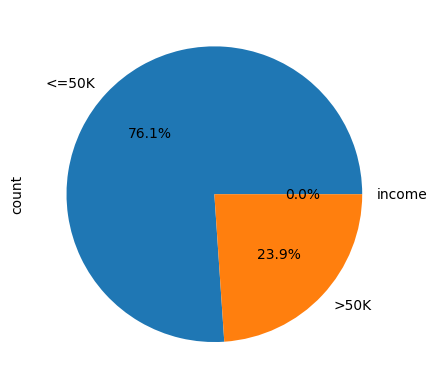

In [228]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

Want to predict income income exceeds $50K/yr based on census data

Handling outliers in  columns

In [229]:
num_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education  ']

Do Handling outliers for num_features

In [230]:
from scipy.stats.mstats import winsorize
import pandas as pd

# Define numerical features
num_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Convert columns to numeric type
df[num_features] = df[num_features].apply(pd.to_numeric, errors='coerce')

# Apply Winsorization to remove outliers
for feature in num_features:
    # Define the limits for winsorization (e.g., at 5th and 95th percentiles)
    winsorized_values = winsorize(df[feature], limits=[0.05, 0.05])
    
    # Replace the original column with the winsorized values
    df[feature] = winsorized_values

# Check the DataFrame after Winsorization
print(df.head())  # Print the first few rows to verify the changes

    age         workclass    fnlwgt  education      marital-status  \
0  63.0         workclass  379522.0  education      marital-status   
1  39.0         State-gov   77516.0  Bachelors       Never-married   
2  50.0  Self-emp-not-inc   83311.0  Bachelors  Married-civ-spouse   
3  38.0           Private  215646.0    HS-grad            Divorced   
4  53.0           Private  234721.0       11th  Married-civ-spouse   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0         occupation   relationship   race   sex        5013.0           0.0   
1       Adm-clerical  Not-in-family  White  Male        2174.0           0.0   
2    Exec-managerial        Husband  White  Male           0.0           0.0   
3  Handlers-cleaners  Not-in-family  White  Male           0.0           0.0   
4  Handlers-cleaners        Husband  Black  Male           0.0           0.0   

   hours-per-week  native-country  income  
0            60.0  native-country  income  
1         

Income Analys

In [231]:
High_income = df[df['income'] == '>50K']
Low_income = df[df['income'] == '<=50K']

# Display summary statistics for each subset
print("High Income  Summary:")
print(High_income['capital-gain'].describe())

print("\nLow Income  Summary:")
print(Low_income['capital-gain'].describe())

High Income  Summary:
count    11687.000000
mean      1039.486181
std       2008.233538
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain, dtype: float64

Low Income  Summary:
count    37155.000000
mean       133.387646
std        692.534042
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain, dtype: float64


Balance Dataset

In [232]:
desired_size = len(High_income)

# Resample the Low Income Subset to match the size of the High Income Subset
resampled_low_income_subset = Low_income.sample(n=desired_size, replace=True, random_state=42)

# Concatenate the resampled Low Income Subset with the High Income Subset
balanced_dataset = pd.concat([resampled_low_income_subset, High_income], axis=0)

# Shuffle the balanced dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Display summary statistics for the balanced dataset
print("Balanced Dataset Summary:")
print(balanced_dataset['capital-gain'].describe())

Balanced Dataset Summary:
count    23374.000000
mean       588.769017
std       1570.773894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain, dtype: float64


In [233]:
High_income = balanced_dataset[balanced_dataset['income'] == '>50K']
Low_income = balanced_dataset[balanced_dataset['income'] == '<=50K']

# Display summary statistics for each subset
print("High Income Summary:")
print(High_income['capital-gain'].describe())

print("Low Income Summary:")
print(Low_income['capital-gain'].describe())

High Income Summary:
count    11687.000000
mean      1039.486181
std       2008.233538
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain, dtype: float64
Low Income Summary:
count    11687.000000
mean       138.051852
std        703.948684
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain, dtype: float64


Encode the Data set

In [234]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_label_encoded = balanced_dataset.copy()  # Make a copy of the original DataFrame
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

for col in columns_to_encode:
    data_label_encoded[col] = label_encoder.fit_transform(balanced_dataset[col])

# View the encoded DataFrame
data_label_encoded

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,42.0,6,166813.0,15,2,4,0,4,1,0.0,0.0,60.0,38,0
1,32.0,4,209691.0,9,2,12,0,4,1,0.0,0.0,42.0,38,1
2,33.0,4,379522.0,11,2,10,0,4,1,0.0,0.0,40.0,38,0
3,40.0,4,138975.0,11,2,2,0,4,1,0.0,0.0,56.0,38,0
4,32.0,4,97306.0,9,4,0,1,4,0,0.0,0.0,48.0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,50.0,4,133963.0,9,2,10,5,4,0,0.0,0.0,40.0,38,1
23370,45.0,0,126754.0,12,2,10,0,4,1,0.0,0.0,45.0,38,1
23371,36.0,6,135416.0,15,2,8,5,4,0,0.0,0.0,50.0,38,0
23372,44.0,4,194049.0,15,0,8,4,2,0,0.0,0.0,35.0,38,0


Feature Scaling

In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_label_encoded)
scaled_data = pd.DataFrame(scaled_data, columns=data_label_encoded.columns)
scaled_data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.152036,1.455568,-0.201502,1.268918,-0.329401,-0.592023,-0.740065,0.365699,0.607175,-0.374835,0.0,1.802070,0.276974,-1.0
1,-0.664604,0.039824,0.272180,-0.422008,-0.329401,1.232540,-0.740065,0.365699,0.607175,-0.374835,0.0,0.025525,0.276974,1.0
2,-0.582940,0.039824,2.148337,0.141634,-0.329401,0.776399,-0.740065,0.365699,0.607175,-0.374835,0.0,-0.171869,0.276974,-1.0
3,-0.011292,0.039824,-0.509034,0.141634,-0.329401,-1.048163,-0.740065,0.365699,0.607175,-0.374835,0.0,1.407282,0.276974,-1.0
4,-0.664604,0.039824,-0.969360,-0.422008,1.154539,-1.504304,-0.127324,0.365699,-1.646972,-0.374835,0.0,0.617707,0.276974,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,0.805348,0.039824,-0.564403,-0.422008,-0.329401,0.776399,2.323639,0.365699,-1.646972,-0.374835,0.0,-0.171869,0.276974,1.0
23370,0.397028,-2.791663,-0.644042,0.423455,-0.329401,0.776399,-0.740065,0.365699,0.607175,-0.374835,0.0,0.321616,0.276974,1.0
23371,-0.337948,1.455568,-0.548351,1.268918,-0.329401,0.320259,2.323639,0.365699,-1.646972,-0.374835,0.0,0.815101,0.276974,-1.0
23372,0.315364,0.039824,0.099379,1.268918,-1.813341,0.320259,1.710898,-2.084597,-1.646972,-0.374835,0.0,-0.665353,0.276974,-1.0


Save Finaliezed Dataset 

In [236]:
scaled_data.to_excel("Finalized.xlsx", index=False)

Heatmap of correlation matrix

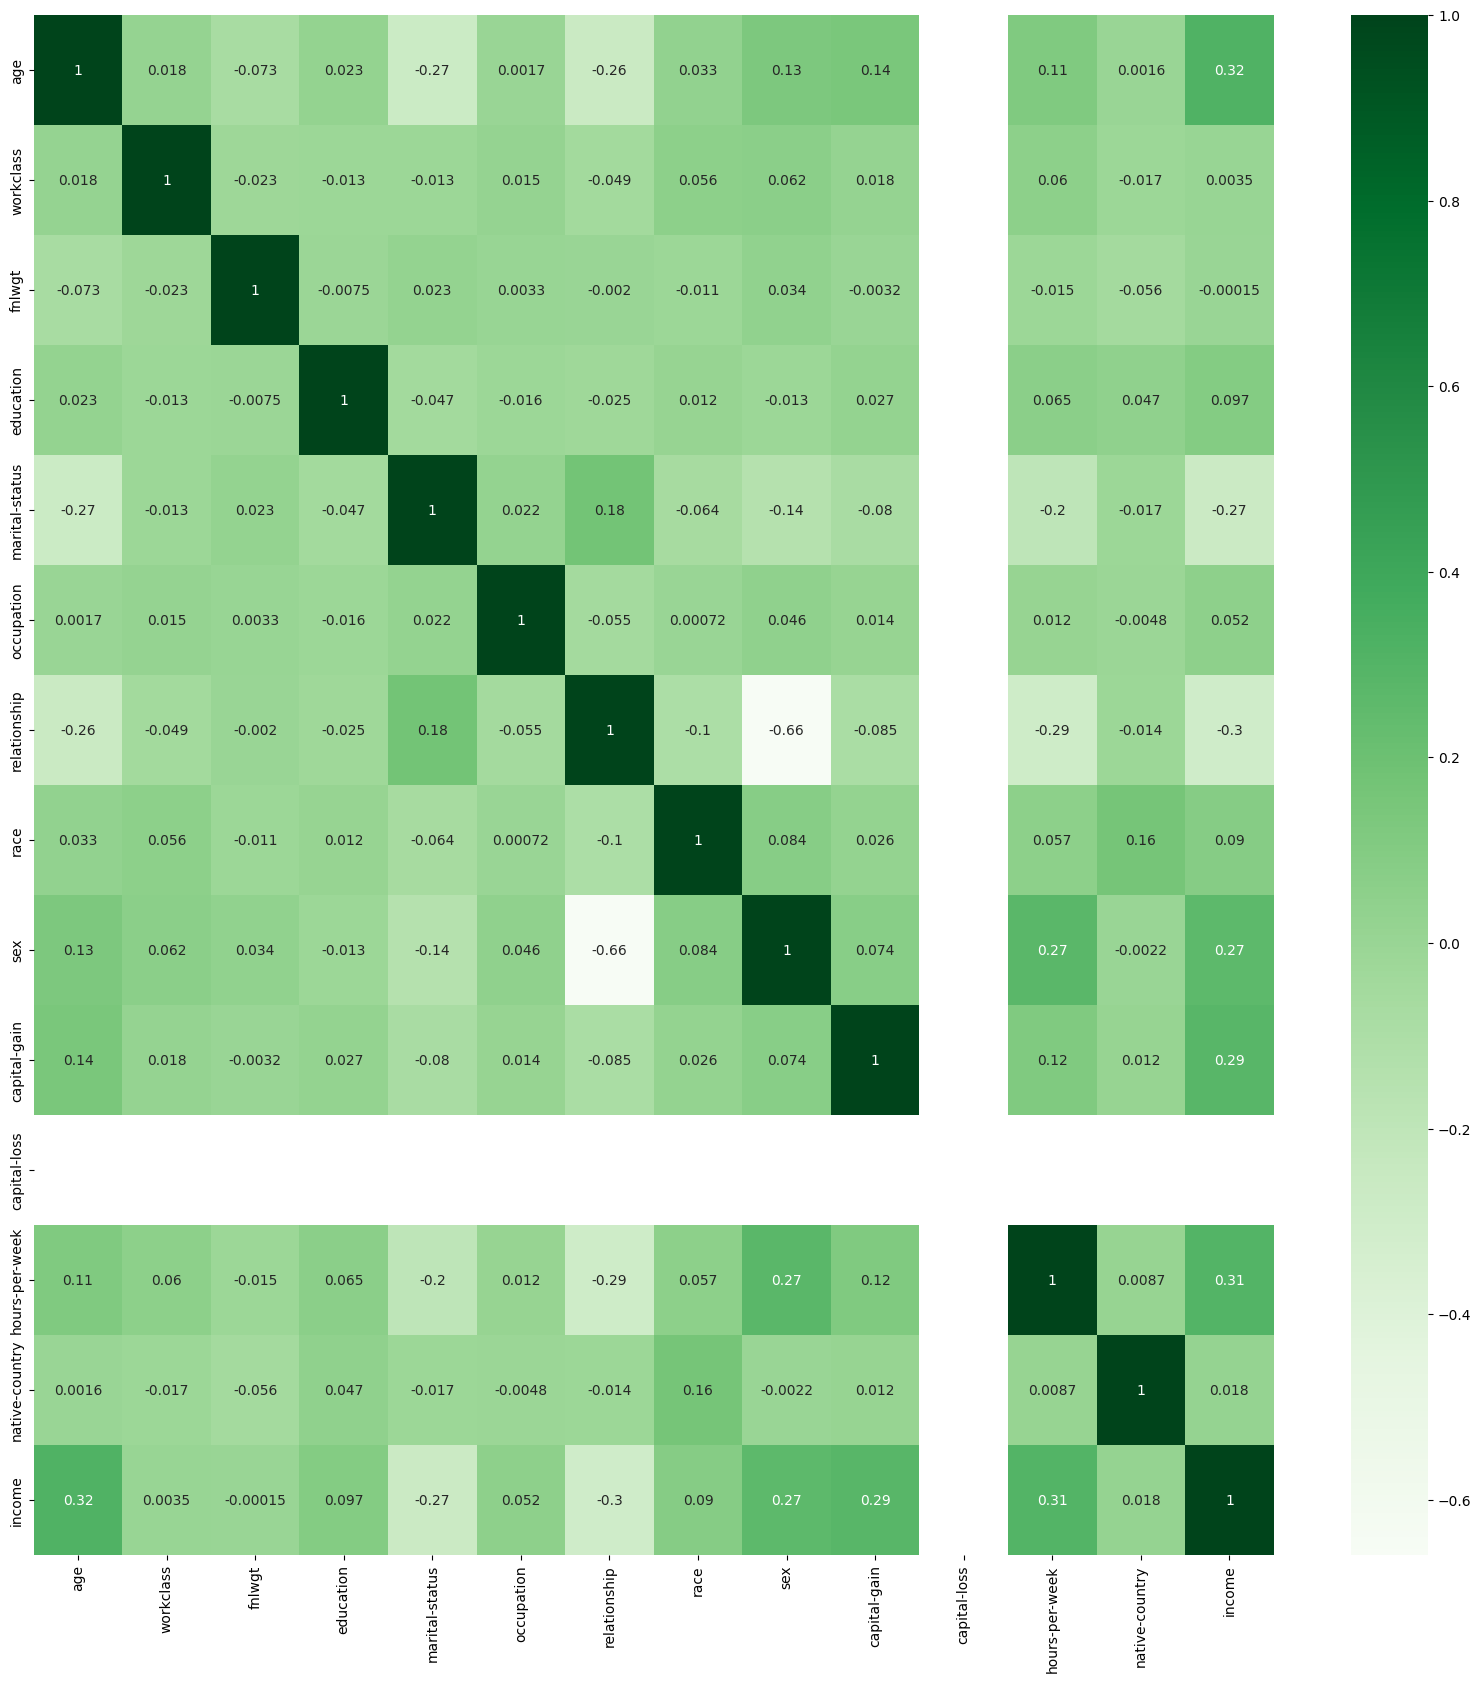

In [237]:
# Heatmap of correlation matrix.
plt.figure(figsize=(20, 20))
sns.heatmap(scaled_data.corr(), annot=True, cmap='Greens')  
plt.show()

Drop "Income column " before PCA

In [238]:
# Drop the 'income' column from the DataFrame
scaled_data.drop(columns=['income'], inplace=True)

# Display the modified DataFrame
scaled_data


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.152036,1.455568,-0.201502,1.268918,-0.329401,-0.592023,-0.740065,0.365699,0.607175,-0.374835,0.0,1.802070,0.276974
1,-0.664604,0.039824,0.272180,-0.422008,-0.329401,1.232540,-0.740065,0.365699,0.607175,-0.374835,0.0,0.025525,0.276974
2,-0.582940,0.039824,2.148337,0.141634,-0.329401,0.776399,-0.740065,0.365699,0.607175,-0.374835,0.0,-0.171869,0.276974
3,-0.011292,0.039824,-0.509034,0.141634,-0.329401,-1.048163,-0.740065,0.365699,0.607175,-0.374835,0.0,1.407282,0.276974
4,-0.664604,0.039824,-0.969360,-0.422008,1.154539,-1.504304,-0.127324,0.365699,-1.646972,-0.374835,0.0,0.617707,0.276974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,0.805348,0.039824,-0.564403,-0.422008,-0.329401,0.776399,2.323639,0.365699,-1.646972,-0.374835,0.0,-0.171869,0.276974
23370,0.397028,-2.791663,-0.644042,0.423455,-0.329401,0.776399,-0.740065,0.365699,0.607175,-0.374835,0.0,0.321616,0.276974
23371,-0.337948,1.455568,-0.548351,1.268918,-0.329401,0.320259,2.323639,0.365699,-1.646972,-0.374835,0.0,0.815101,0.276974
23372,0.315364,0.039824,0.099379,1.268918,-1.813341,0.320259,1.710898,-2.084597,-1.646972,-0.374835,0.0,-0.665353,0.276974


Principal Component Analysis(PCA)

In [239]:
from sklearn.decomposition import PCA

pca = PCA()
scaled_data_pca = pca.fit_transform(scaled_data)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Create a DataFrame to display attribute names and their contributions to explained variance
components_df = pd.DataFrame({'1.Principal Component': [f"PCA{i+1}" for i in range(len(explained_variance_ratio))],
                              '2.Explained Variance Ratio': explained_variance_ratio,
                              '3.Cumulative Explained Variance Ratio': cumulative_variance_ratio})

preprocessed_data=pd.DataFrame(columns=[f"PCA{i+1}" for i in range(len(explained_variance_ratio))],data=scaled_data_pca)

# Print the DataFrame
print("Explained Variance Ratio for  Principal Component:")
components_df

Explained Variance Ratio for  Principal Component:


,1.Principal Component,2.Explained Variance Ratio,3.Cumulative Explained Variance Ratio
0,PCA1,1.788162e-01,0.178816
1,PCA2,9.934634e-02,0.278162
2,PCA3,9.466167e-02,0.372824
3,PCA4,8.577967e-02,0.458604
4,PCA5,8.273879e-02,0.541343
5,PCA6,8.236384e-02,0.623706
6,PCA7,8.086125e-02,0.704568
7,PCA8,7.609327e-02,0.780661
8,PCA9,6.851940e-02,0.849180
9,PCA10,6.756811e-02,0.916748


Display preprocessed_data

In [240]:
preprocessed_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,-1.744039,-0.477293,-0.509536,-0.217802,-1.010284,-1.443334,-1.196561,-0.148421,-0.540269,-0.205725,0.544017,-0.043857,3.632317e-17
1,-0.649881,0.727134,-1.059811,0.200249,0.735070,0.269732,0.060930,-0.560662,-0.370404,-0.059961,-0.596606,-0.220997,-6.381507e-18
2,-0.567349,1.150566,-1.043502,-1.161906,0.380756,-0.402281,0.907151,-1.166036,0.105895,-0.419880,-0.413974,-0.228258,-4.104489e-17
3,-1.334663,-0.362760,-0.306201,-0.386162,-1.081154,0.199012,-0.679036,0.437178,-0.771968,0.098058,0.324065,-0.093329,-1.228121e-16
4,1.201097,-0.730330,-0.484845,0.199741,-1.280679,0.212293,-0.479346,1.189934,-0.629378,0.348630,0.955336,-1.267254,3.560853e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,1.804352,-1.490972,0.525099,1.138716,0.585795,0.116137,0.385660,-1.116774,-0.705937,0.105729,0.745959,0.693390,1.836368e-18
23370,-0.899518,-0.339445,0.095227,-1.311834,1.564029,2.075285,-0.630959,0.036169,-0.268891,0.859578,0.092460,0.026366,-3.027306e-19
23371,1.602789,-1.725024,0.018646,0.605927,-0.069946,-2.010569,-0.784730,-0.952899,-1.214284,0.036165,0.448109,0.567558,-9.917729e-19
23372,1.651940,-1.146263,2.204698,-0.350429,0.562290,-0.606107,-0.710395,-1.537715,-0.404496,-1.531922,-0.805692,0.135513,5.323958e-19


Plot distribution of each attribute after PCA

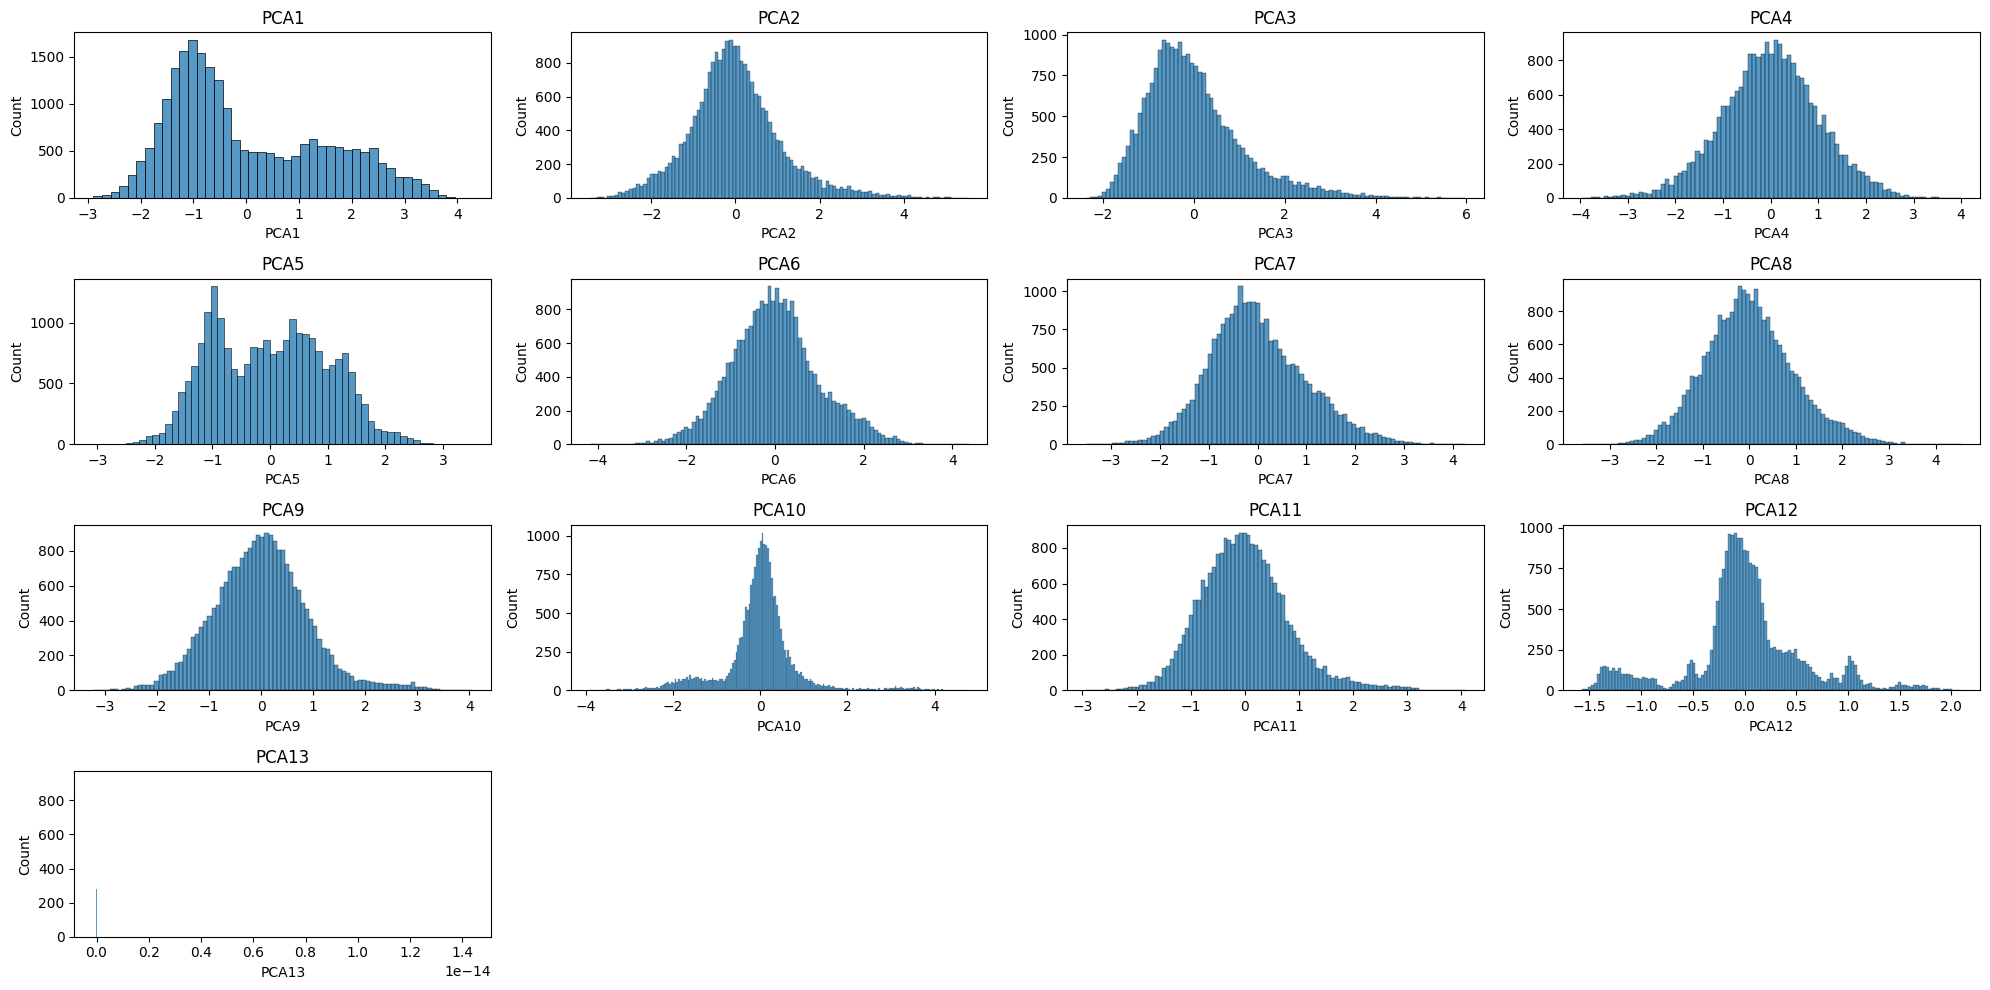

In [241]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(preprocessed_data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(preprocessed_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()